# Understanding Decision Tree Workflow


# Importing Relevant Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Loading Iris Dataset

In [13]:
from sklearn import datasets

iris = datasets.load_iris()
data=pd.DataFrame(iris.data, columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



It's always better to check for anomalies beforehand. Let's do the same :) 

In [14]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


# Fixing Target Variable

In [15]:
y=iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


# Creating Decision Tree Classifier Model

In [16]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid=train_test_split(data,y,train_size=0.8,test_size=0.2,random_state=0)

clf=DecisionTreeClassifier(random_state=0)
model=clf.fit(X_train,y_train)


# Visualizing D-Tree Rules Of The Model


Text Representation is actually used in real-time to keep log of information about the model into a text file. 

It comes is handy while working with applications without User Interface.


In [17]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [18]:
pip install dtreeviz


There are multiple ways to visualize the workflow of a Decision Tree.

For an instance, through libraries like tree, Graphviz or Dtreeviz.

I chose dtreeviz because of the following reasons:

- It represents distribution of class(here, Species) in each leaf of D-Tree
- It represents distribution of decision feature in each node of D-Tree
- Class color matching legends are clearly distingushable

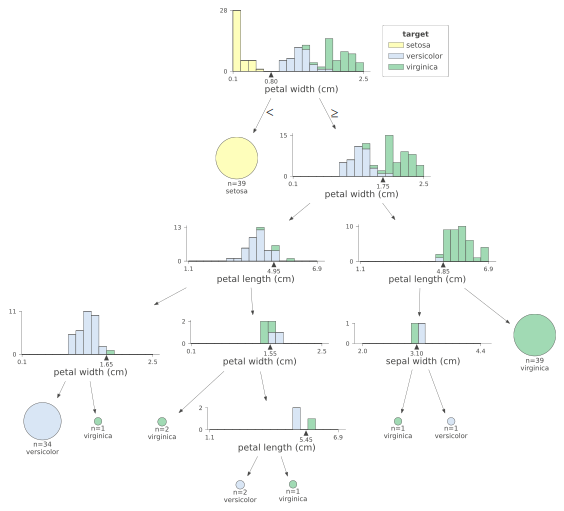

In [19]:
from dtreeviz.trees import dtreeviz 

viz = dtreeviz(clf, X_train, y_train,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))

viz

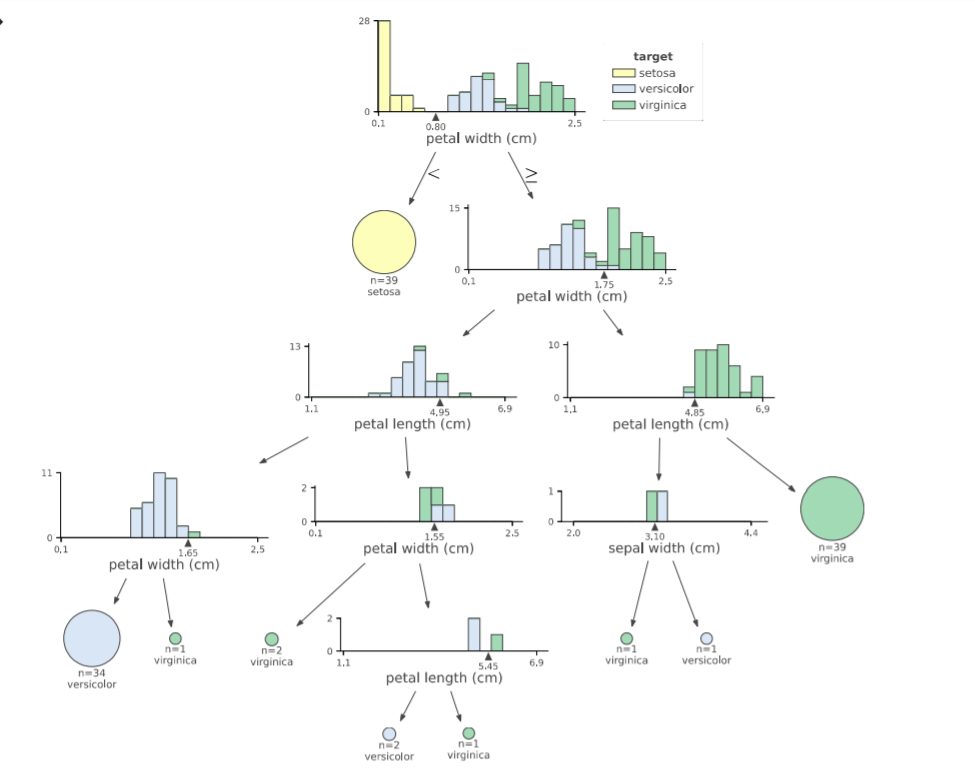

*Attaching the snippet of the output from runtime since it is not visible after downloading and it is just showing an img symbol.*

In [26]:
viz.save("decision_tree.svg")


# Well, Work done is never complete without testing it. So, Shall we?

In [20]:
predictions=model.predict(X_valid)
predictions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])


# Let's Evaluate The Results!

In [21]:
from sklearn.metrics import mean_absolute_error

MAE=mean_absolute_error(predictions,y_valid)
print('Mean Absolute Error: ',MAE)

Mean Absolute Error:  0.0


In [22]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  
results = confusion_matrix(y_valid,predictions) 
  
print('Confusion Matrix :')
results

Confusion Matrix :


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [23]:
print('Accuracy Score :')
accuracy_score(y_valid, predictions)

Accuracy Score :


1.0

In [24]:
print ('Report :',classification_report(y_valid, predictions) )

Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




# So Far So Good. Happy Learning :)